### Classes
- .h files basically get tacked on to the beginning of main.cc by the compiler
    - in case of multiple headers, use
    

```c++
#ifndef myheader_H
#define myheader_H
```
    - tells the compiler to disregard anything that is already defined
        - e.g. if myheader1.h has a function bob() and myheader2.h includes mhyeader1.h, on compilation, the compiler pastes myheader1.h to the top of main.cc and then myheader2.cc but when it hits the include myheader1.h line in myheader2.h, it doesn't paste myheader1.h again

In [ ]:
class Num1
{
    public:
    // constructor: like __init__
    // must be named the same thing as the class
    Num1(const int value){ // can have arguments but shouldn't return anything
        data = new int;
        *data = value;
        std::cout << "hello, constructor" << std::endl;
    }
    
    
    // destructor: last function called before destruction of object
    ~Num1(){ // collect the memory which has been allocated for any variables created
        delete data;
        std::cout << "goodbye, destructor" << std::endl;

    }
    Num(const Num1& x){
        //data = x.data;
        *data = *x.data;
        std::cout << "hello, copy constructor" << std::endl;
    }
    
    void print(void){
        std::cout << *data << std::endl;
    }
    
    
    private:
        int *data = nullptr; // using a pointer forces the data to be stored in heap
        
}

In [ ]:
Num bob(4564);
// Num b(a);
bob.print();

Num steve(3.14159265358979)


- num cannot handle floats as written

In [4]:
class Num2
{
    public:
    // constructor: like __init__
    // must be named the same thing as the class
    Num2(const float value){ // can have arguments but shouldn't return anything
        data = new float;
        *data = value;
        std::cout << "hello, constructor" << std::endl;
    }
    
    
    // destructor: last function called before destruction of object
    ~Num2(){ // collect the memory which has been allocated for any variables created
        delete data;
        std::cout << "goodbye, destructor" << std::endl;

    }
    Num2(const Num2& x){
        //data = x.data;
        *data = *x.data;
        std::cout << "hello, copy constructor" << std::endl;
    }
    
    void print(void){
        std::cout << *data << std::endl;
    }
    
    
    private:
        float *data = nullptr; // using a pointer forces the data to be stored in heap
        
}

In [5]:
Num2 bob(4564);
// Num b(a);
bob.print();

Num2 steve(3.14159265358979);
steve.print();


hello, constructor
4564
hello, constructor
3.14159


- now Num2 can use ints or floats but it is converting the ints to floats 
- lets make one below that accepts both
    - you have to specify in the object declaration (in main.cc or whereever)
    
    `ClassName<datatype> variable(initialvalue);`

In [5]:
template <typename NumType>

class Num
{
    public:
    // constructor: like __init__
    // must be named the same thing as the class
    Num(const NumType value = 0) :// can have arguments but shouldn't return anything
        data{value} //comment out either this or the block below
//         pi{3.14159}
        
    { 
//         data = new NumType;
//         *data = value;
        std::cout << "hello, constructor" << std::endl;
    }
    
    
    // destructor: last function called before destruction of object
    ~Num(){ // collect the memory which has been allocated for any variables created
        delete data;
        std::cout << "goodbye, destructor" << std::endl;

    }
    Num(const Num& x){
        //data = x.data;
        *data = *x.data;
        std::cout << "hello, copy constructor" << std::endl;
    }
    
    void print(void){
        std::cout << *data << std::endl;
    }

    //move
    Num operator = (Num && rhs);// :
       // data{rhs.data}
    {
        rhs.data = nullptr;
        return *this;
    }
    
    private:
        float *data = nullptr; // using a pointer forces the data to be stored in heap
//         NumType *data = nullptr; // using a pointer forces the data to be stored in heap
        bool isntegative;
        const float pi;
        
};

input_line_51:38:5: error: expected member name or ';' after declaration specifiers
    {
    ^
input_line_51:9:9: error: member initializer 'data' does not name a non-static data member or base class
        data{value} //comment out either this or the block below
        ^~~~~~~~~~~
input_line_51:21:16: error: use of undeclared identifier 'data'
        delete data;
               ^
input_line_51:27:10: error: use of undeclared identifier 'data'
        *data = *x.data;
         ^
input_line_51:32:23: error: use of undeclared identifier 'data'
        std::cout << *data << std::endl;
                      ^


debug the above

In [ ]:
Num3<int> bob(4564);
// Num b(a);
bob.print();

Num3<float> steve(3.14159265358979);
steve.print();

Num3<char> sarah("k");
sarah.print();


In [3]:
#ifndef _MY_VECTOR_
#define _MY_VECTOR_
#include <iostream>

template <typename DataType>
class MyVector
{
    public:
    //constructor
    MyVector(const int init_capacity = 16) :
        theCapacity{init_capacity},
        theSize{0}
    {
        data = new DataType [init_capacity]; // makes an array
    }
        
    
    ~MyVector()
    {
        delete [] data; // square brackets tell delete that it is an array. 
        //Without [], only the 0th index is deleted (memory leak)
    }
    
    int size(void)
    {
        return theSize;
    }
    
    int capacity(void)
    {
        return theCapacity;
    }
    
    void print(void);
    {
        for(int i=0; i < theSize; ++i)
        {
            cout << data[i] << endl; // prints data of ith element
            cout << *(data + i) << << endl; // prints pointer locatoin of~ ith element 
        }
    }
        
    void insert(const DataType &value, const int index)
    {
        if(index < thesize && theSize < the Capacity)
        {
            for(i = theSize - 1; i >= index; --i)
            {
                data[i + 1] = move(data[i]);
            }
            data[index] = value;
        }
        return;
    }
    
    private:
        DataType *data = nullptr; // initializes data as a pointer to nothing
        int theSize; // number of elements we have
        int theCapacity; // number of elements possible


};

#endif

input_line_49:35:5: error: expected member name or ';' after declaration specifiers
    {
    ^
input_line_49:14:9: error: use of undeclared identifier 'data'
        data = new DataType [init_capacity]; // makes an array
        ^
input_line_49:20:19: error: use of undeclared identifier 'data'
        delete [] data; // square brackets tell delete that it is an array. 
                  ^


In [2]:
#ifndef _MY_VECTOR_H_
#define _MY_VECTOR_H_
#include <iostream>
template <typename DataType>
class MyVector
{
    public:
        MyVector(const int init_capacity = 16) :
            theCapacity{init_capacity},
            theSize{0}
            {
                data = new DataType [init_capacity]; 
            }
  
        ~MyVector() 
        {
            delete [] data;
        }
        int size(void)
        {
            return theSize;
        }
        int capacity(void)
        {
            return theCapacity;
        }
        void print(void)
        {
            std::cout << "Printing the vector" << std::endl;
            for(int i = 0; i < theSize; ++ i)
            {
                std::cout << data[i] << std::endl;
                //std::cout << *(data + i) << std::endl;
            } 
        }
    
        void insert(const DataType &value, const int index)
        {
            if(index <= theSize)
            {
                if(theSize >= theCapacity)
                {
                    resize(theSize + 1);
                } 
                else
                {
                    ++ theSize;
                }
      
                for(int i = theSize - 2; i >= index; -- i)
                {
                    data[i + 1] = std::move(data[i]);
                }
                data[index] = value;
            }  
        return;
        }
    
    void push_back(const DataType &value)
    {
        insert(value, theSize);
    }
    
    void reserve(const int newCapacity)
    {
            if(newCapacity > theCapacity)
            {
            theCapacity = newCapacity;
            DataType *tmp = new DataType [newCapacity];
            for(int i = 0; i < theSize; ++ i)
            {
                tmp[i] = std::move(data[i]);
            }
            std::swap(data, tmp);
            delete [] tmp;
            }
        return;  
    }
    
    void resize(const int newSize) 
    {
        theSize = newSize;
        reserve(2 * newSize);
        return;
    }
    
    void remove(const int index)
    {
        if(index >= 0 && index <= theSize - 1)
        {
            for(int i = index; i < theSize - 1; ++ i)
            {
                data[i] = std::move(data[i + 1]);
            }
        -- theSize;
        }
    return;
    }
    
    void pop_back(void)
    {
        remove(theSize - 1);
        return;
    }
    
    typedef DataType* iterator;
    typedef DataType* const_iterator;

    iterator begin()
    {
        return &data[0];
    }

    iterator end()
    {
        return data[size()];
    }
    
    const_iterator begin()
    {
        
    }
    
    private:
        DataType *data = nullptr;
        int theSize; // the num of elements we have
        int theCapacity; // the num of elements we can hold
};
#endif

input_line_48:119:20: error: class member cannot be redeclared
    const_iterator begin()
                   ^
input_line_48:109:14: note: previous definition is here
    iterator begin()
             ^


In [4]:
MyVector<int> a;
cout << a.size() << endl;
cout << a.capacity() << endl;
a.print();

MyVector<int> v;
for(int i = 0; i < 16; ++ i)
{
    v.push_back(i);
}

for(MyVector<int>::const_iterator itr = v.begin(); itr != v.end(); ++itr)
{
    cout << *itr << endl;
}


input_line_50:2:2: error: 'MyVector' does not name a template but is followed by template arguments
 MyVector<int> a;
 ^       ~~~~~
input_line_50:2:2: note: non-template declaration found by name lookup
input_line_50:3:9: error: use of undeclared identifier 'a'
cout << a.size() << endl;
        ^
input_line_50:4:9: error: use of undeclared identifier 'a'
cout << a.capacity() << endl;
        ^
input_line_50:5:1: error: use of undeclared identifier 'a'
a.print();
^
input_line_50:7:1: error: no template named 'MyVector'
MyVector<int> v;
^
input_line_50:13:5: error: no template named 'MyVector'
for(MyVector<int>::const_iterator itr = v.begin(); itr != v.end(); ++itr)
    ^


### Overflow
- happens when # of data elements exceeds size of array/vector
- need to realocate data when more space is needed

### Why vectors
- handles the memory stuff for you
    - unlike lists

#### <p style="text-align: center;">Vector vs (Linked) List memory blocks</p>
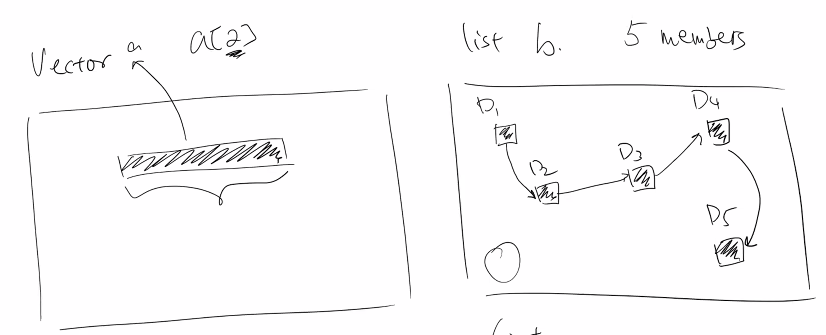
 


### Linked Lists
- as in 268 basically
- built off of the attributes previous and next which point to adjacent nodes
    - insertions and deleitons can be accomplished by adjusting the next value of the one to the left and the previous value of the one to the right
    - i.e. make the left one's next be the new one and the right one's previous be the new one
    - also have to make the new one's previous and next match left and right

```c++
// insert
z->prev = x;
z->next = z;
z->next = x->next;
z->next->prev = z;
```

```cpp
// delete
// why switch to . over -> ? who knows.
z.prev.next = z.next;
z.next.prev = z.prev;
z.next = nullptr;
z.prev = nullptr;
z
```

input_line_42:2:5: error: unknown type name 'DataType'
    DataType data;
    ^


eval:
- Example lecture code is often wrong. Once this is realized, it is changed without an explanation of the error or the fix implemented.
- Almost exclusively uses single letter variable names in functions which makes things . If an actual IDE was used, errors would be easy to identify and actual descriptive variable names could be used. 
    - Notepad/nano/etc are usefull for teaching simple stuff like EECS 168 and maybe 268. I think it is irresponsible not to teach in the environment that we will be utilizing in the "real world". No one is going to go work for Google or IBM and use Notepad. Teaching students to use "x", "p", and "d" as variable names and assuming that those students won't go out into the world thinking that that is an acceptable practice is a wild assumption. Practice does not make perfect, it makes permanent; 

### Iterator
- common interface used in many data structures
    - linear and iterative ones
- a helper subclass 
- 



In [ ]:


for(i=iterator.begin; i < iterator.end; i++)
{
    
}